In [24]:
using Plots
using Measures, CSV, DataFrames, LinearAlgebra

# X_GATE 3 switches 7 photons

In [81]:
# 1 to 6
infidelities_snap_disp = [
    0.46651443231897505	
    0.17269565656962327	
    0.04751990062546152	
    0.0012056685687320545 
    7.481634554706851e-5 
    0.0001335802072114367]

# 16 to 40
infidelities_ecd = [
    0.3391703408144481
    0.23903992964534537
    0.08994959727658447
    0.06433382006020827
    0.022273102536182976
0.004010219481816346
0.0004694727918465036
]

#0 to 1
infidelities_state_snap_disp = [
    0.036666303892263
    1.5857429203069984e-9
]

# 4 to 9
infidelities_state_ecd = [
    0.05402521573127872
    0.018382916741753852
    0.006410312232681736
    6.363257943697853e-6
    7.40373094110236e-6
    1.5857429203069984e-7
]

X_gate_ecd = DataFrame(CSV.File("../../data/X_gate/7_photons/ECD/(3,4).txt"))
X_gate_snap = DataFrame(CSV.File("../../data/X_gate/7_photons/SNAP_Disp/(3,4).txt"))

infidelities_ecd = [norm(minimum(eachrow(val).fidelity)) for val in groupby(X_gate_ecd, "blocks")]
blocks_ecd = [minimum(eachrow(val).blocks) for val in groupby(X_gate_ecd, "blocks")]

infidelities_snap_disp = [norm(minimum(eachrow(val).fidelity)) for val in groupby(X_gate_snap, "blocks")]
blocks_snap_disp = [minimum(eachrow(val).blocks) for val in groupby(X_gate_snap, "blocks")]

infidelities_ecd

7-element Vector{Float64}:
 0.35925037140866123
 0.2504178281224291
 0.08994959727658447
 0.06433382006020827
 0.022273102536182976
 0.004010219481816346
 0.0004694727918465036

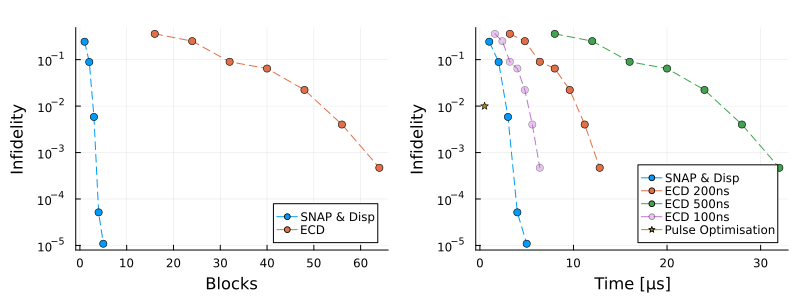

In [82]:
plot(blocks_snap_disp,infidelities_snap_disp, label= "SNAP & Disp", linestyle=:dash, marker = :circle, xlabel="Blocks", ylabel="Infidelity", yaxis=:log, fmt = :PDF, yticks=exp10.(range(-16, stop=0, length=17)), legend=:bottomright, layout=2, subplot=1, size=(800,300), margin=5mm)
plot!(blocks_ecd,infidelities_ecd, label= "ECD", linestyle=:dash, marker = :circle, xlabel="Blocks", ylabel="Infidelity", yaxis=:log, fmt = :PDF, yticks=exp10.(range(-16, stop=0, length=17)), subplot=1)
plot!(blocks_snap_disp,infidelities_snap_disp, label= "SNAP & Disp", linestyle=:dash, marker = :circle, xlabel="Time [μs]", ylabel="Infidelity", yaxis=:log, fmt = :PDF, yticks=exp10.(range(-16, stop=0, length=17)), legend=:bottomright, layout=2, subplot=2)
plot!(blocks_ecd*0.2,infidelities_ecd, label= "ECD 200ns", linestyle=:dash, marker = :circle, xlabel="Time [μs]", ylabel="Infidelity", yaxis=:log, fmt = :PDF, yticks=exp10.(range(-16, stop=0, length=17)), subplot=2)
plot!(blocks_ecd*0.5,infidelities_ecd, label= "ECD 500ns", linestyle=:dash, marker = :circle, xlabel="Time [μs]", ylabel="Infidelity", yaxis=:log, fmt = :PDF, yticks=exp10.(range(-16, stop=0, length=17)), subplot=2)
plot!(blocks_ecd*0.1,infidelities_ecd, label= "ECD 100ns", linestyle=:dash, marker = :circle, markeralpha= 0.4, xlabel="Time [μs]", ylabel="Infidelity", yaxis=:log, fmt = :PDF, yticks=exp10.(range(-16, stop=0, length=17)), subplot=2)
plot!([0.5], [1e-2],label= "Pulse Optimisation", linestyle=:dash, marker = :star, xlabel="Time [μs]", ylabel="Infidelity", yaxis=:log, fmt = :PDF, yticks=exp10.(range(-16, stop=0, length=17)), subplot=2)
#savefig("../../plots/blocksandtime_ecd_vs_snap_vs_PO/gateprep3X_7photons.pdf")

In [6]:
plot([i for i in 1:2],infidelities_state_snap_disp, label= "SNAP & Disp", linestyle=:dash, marker = :circle, xlabel="Blocks", ylabel="Infidelity", yaxis=:log, fmt = :PDF, yticks=exp10.(range(-16, stop=0, length=17)), legend=:bottomright, layout=2, subplot=1, size=(800,300), margin=5mm)
plot!([i for i in 4:1:9],infidelities_state_ecd, label= "ECD", linestyle=:dash, marker = :circle, xlabel="Blocks", ylabel="Infidelity", yaxis=:log, fmt = :PDF, yticks=exp10.(range(-16, stop=0, length=17)), subplot=1)
plot!([i for i in 1:2],infidelities_state_snap_disp, label= "SNAP & Disp", linestyle=:dash, marker = :circle, xlabel="Time [μs]", ylabel="Infidelity", yaxis=:log, fmt = :PDF, yticks=exp10.(range(-16, stop=0, length=17)), legend=:bottomright, layout=2, subplot=2)
plot!([i*0.2 for i in 4:1:9],infidelities_state_ecd, label= "ECD 200ns", linestyle=:dash, marker = :circle, xlabel="Time [μs]", ylabel="Infidelity", yaxis=:log, fmt = :PDF, yticks=exp10.(range(-16, stop=0, length=17)), subplot=2)
plot!([i*0.5 for i in 4:1:9],infidelities_state_ecd, label= "ECD 500ns", linestyle=:dash, marker = :circle, xlabel="Time [μs]", ylabel="Infidelity", yaxis=:log, fmt = :PDF, yticks=exp10.(range(-16, stop=0, length=17)), subplot=2)
plot!([i*0.150 for i in 4:1:9],infidelities_state_ecd, label= "ECD 150ns", linestyle=:dash, marker = :circle, markeralpha= 0.4, xlabel="Time [μs]", ylabel="Infidelity", yaxis=:log, fmt = :PDF, yticks=exp10.(range(-16, stop=0, length=17)), subplot=2)
plot!([0.03], [1.271882e-8], label= "Pulse optimisation", linestyle=:dash, marker = :star, subplot=2)
savefig("../../plots/blocksandtime_ecd_vs_snap_vs_PO/stateprep3X_7photons.pdf")

"/Users/andreamaestri/Desktop/Thesis_julia/BTgates/plots/blocksandtime_ecd_vs_snap_vs_PO/stateprep3X_7photons.pdf"

# X_GATE 3,4 5 photons

In [77]:
X_gate_ecd = DataFrame(CSV.File("../../data/X_gate/5_photons/ECD/(3,4).txt"))
X_gate_snap = DataFrame(CSV.File("../../data/X_gate/5_photons/SNAP_Disp/(3,4).txt"))

infidelities_ecd = [norm(minimum(eachrow(val).fidelity)) for val in groupby(X_gate_ecd, "blocks")]
blocks_ecd = [minimum(eachrow(val).blocks) for val in groupby(X_gate_ecd, "blocks")]

infidelities_snap_disp = [norm(minimum(eachrow(val).fidelity)) for val in groupby(X_gate_snap, "blocks")]
blocks_snap_disp = [minimum(eachrow(val).blocks) for val in groupby(X_gate_snap, "blocks")]

infidelities_ecd
blocks_ecd
infidelities_snap_disp

5-element Vector{Float64}:
 0.10664835561662211
 0.11766837704629518
 0.00024271372181228212
 0.00024271372181228212
 4.505113181285658e-6

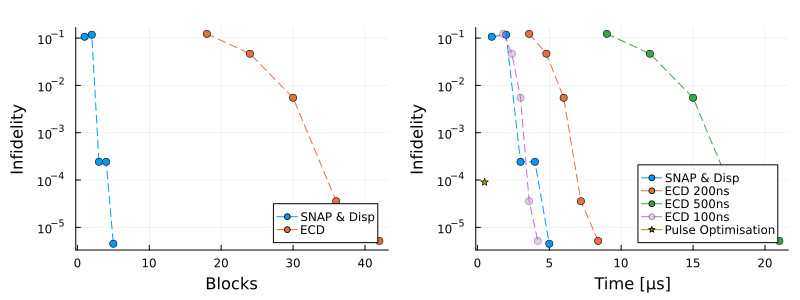

In [78]:
plot(blocks_snap_disp,infidelities_snap_disp, label= "SNAP & Disp", linestyle=:dash, marker = :circle, xlabel="Blocks", ylabel="Infidelity", yaxis=:log, fmt = :PDF, yticks=exp10.(range(-16, stop=0, length=17)), legend=:bottomright, layout=2, subplot=1, size=(800,300), margin=5mm)
plot!(blocks_ecd,infidelities_ecd, label= "ECD", linestyle=:dash, marker = :circle, xlabel="Blocks", ylabel="Infidelity", yaxis=:log, fmt = :PDF, yticks=exp10.(range(-16, stop=0, length=17)), subplot=1)
plot!(blocks_snap_disp,infidelities_snap_disp, label= "SNAP & Disp", linestyle=:dash, marker = :circle, xlabel="Time [μs]", ylabel="Infidelity", yaxis=:log, fmt = :PDF, yticks=exp10.(range(-16, stop=0, length=17)), legend=:bottomright, layout=2, subplot=2)
plot!(blocks_ecd*0.2,infidelities_ecd, label= "ECD 200ns", linestyle=:dash, marker = :circle, xlabel="Time [μs]", ylabel="Infidelity", yaxis=:log, fmt = :PDF, yticks=exp10.(range(-16, stop=0, length=17)), subplot=2)
plot!(blocks_ecd*0.5,infidelities_ecd, label= "ECD 500ns", linestyle=:dash, marker = :circle, xlabel="Time [μs]", ylabel="Infidelity", yaxis=:log, fmt = :PDF, yticks=exp10.(range(-16, stop=0, length=17)), subplot=2)
plot!(blocks_ecd*0.1,infidelities_ecd, label= "ECD 100ns", linestyle=:dash,  markeralpha= 0.4, marker = :circle, xlabel="Time [μs]", ylabel="Infidelity", yaxis=:log, fmt = :PDF, yticks=exp10.(range(-16, stop=0, length=17)), subplot=2)
plot!([0.5], [9e-5],label= "Pulse Optimisation", linestyle=:dash, marker = :star, xlabel="Time [μs]", ylabel="Infidelity", yaxis=:log, fmt = :PDF, yticks=exp10.(range(-16, stop=0, length=17)), subplot=2)
#savefig("../../plots/blocksandtime_ecd_vs_snap_vs_PO/gateprepX_5photons.pdf")

# X_GATE 3,4 3 photons

In [67]:
X_gate_ecd = DataFrame(CSV.File("../../data/X_gate/3_photons/ECD/(3,4).txt"))
X_gate_snap = DataFrame(CSV.File("../../data/X_gate/3_photons/SNAP_Disp/(3,4).txt"))

infidelities_ecd = [norm(minimum(eachrow(val).fidelity)) for val in groupby(X_gate_ecd, "blocks")]
blocks_ecd = [minimum(eachrow(val).blocks) for val in groupby(X_gate_ecd, "blocks")]

infidelities_snap_disp = [norm(minimum(eachrow(val).fidelity)) for val in groupby(X_gate_snap, "blocks")]
blocks_snap_disp = [minimum(eachrow(val).blocks) for val in groupby(X_gate_snap, "blocks")]

infidelities_ecd
blocks_ecd
infidelities_snap_disp

5-element Vector{Float64}:
 0.09312769461160564
 0.06144978392586553
 7.665159184266912e-6
 2.930988785010413e-14
 0.0

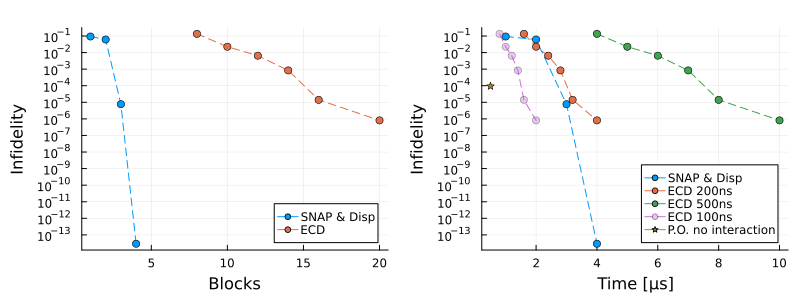

In [68]:
plot(blocks_snap_disp[1:end-1], infidelities_snap_disp[1:end-1], label= "SNAP & Disp", linestyle=:dash, marker = :circle, xlabel="Time [μs]", ylabel="Infidelity", yaxis=:log, fmt = :PDF, yticks=exp10.(range(-16, stop=0, length=17)), legend=:bottomright, layout=2, subplot=1, size=(800,300), margin=5mm)
plot!(blocks_snap_disp[1:end-1],infidelities_snap_disp[1:end-1], label= "SNAP & Disp", linestyle=:dash, marker = :circle, xlabel="Time [μs]", ylabel="Infidelity", yaxis=:log, fmt = :PDF, yticks=exp10.(range(-16, stop=0, length=17)), legend=:bottomright, layout=2, subplot=2)
plot!(blocks_ecd,infidelities_ecd, label= "ECD", linestyle=:dash, marker = :circle, xlabel="Blocks", ylabel="Infidelity", yaxis=:log, fmt = :PDF, yticks=exp10.(range(-16, stop=0, length=17)), subplot=1)
plot!(blocks_ecd*0.2,infidelities_ecd, label= "ECD 200ns", linestyle=:dash, marker = :circle, xlabel="Time [μs]", ylabel="Infidelity", yaxis=:log, fmt = :PDF, yticks=exp10.(range(-16, stop=0, length=17)), subplot=2)
plot!(blocks_ecd*0.5,infidelities_ecd, label= "ECD 500ns", linestyle=:dash, marker = :circle, xlabel="Time [μs]", ylabel="Infidelity", yaxis=:log, fmt = :PDF, yticks=exp10.(range(-16, stop=0, length=17)), subplot=2)
plot!(blocks_ecd*0.1,infidelities_ecd, label= "ECD 100ns", linestyle=:dash,  markeralpha= 0.4, marker = :circle, xlabel="Time [μs]", ylabel="Infidelity", yaxis=:log, fmt = :PDF, yticks=exp10.(range(-16, stop=0, length=17)), subplot=2)
plot!([0.5], [9.4e-5], label="P.O. no interaction", marker = :star, subplot=2)
#savefig("../../plots/blocksandtime_ecd_vs_snap_vs_PO/gateprepX_3photons.pdf")

# RX_GATE 3,4 7 photons

In [84]:
X_gate_ecd = DataFrame(CSV.File("../../data/R_X/3_photons/ECD/pi_over_10.txt"))
X_gate_snap = DataFrame(CSV.File("../../data/R_X/3_photons/SNAP_Disp/pi_over_10.txt"))

infidelities_ecd = [norm(minimum(eachrow(val).fidelity)) for val in groupby(X_gate_ecd, "blocks")]
blocks_ecd = [minimum(eachrow(val).blocks) for val in groupby(X_gate_ecd, "blocks")]

infidelities_snap_disp = [norm(minimum(eachrow(val).fidelity)) for val in groupby(X_gate_snap, "blocks")]
blocks_snap_disp = [minimum(eachrow(val).blocks) for val in groupby(X_gate_snap, "blocks")]

5-element Vector{Float64}:
 0.003168088343223241
 3.724224717782665e-5
 2.0964097124931413e-10
 1.7763568394002505e-15
 6.661338147750939e-16

In [13]:
plot([i for i in 1:3],infidelities_snap_disp, label= "SNAP & Disp", linestyle=:dash, marker = :circle, xlabel="Blocks", ylabel="Infidelity", yaxis=:log, fmt = :PDF, yticks=exp10.(range(-16, stop=0, length=17)), legend=:bottomright, layout=2, subplot=1, size=(800,300), margin=5mm)
plot!([i for i in 8:8:48],infidelities_ecd, label= "ECD", linestyle=:dash, marker = :circle, xlabel="Blocks", ylabel="Infidelity", yaxis=:log, fmt = :PDF, yticks=exp10.(range(-16, stop=0, length=17)), subplot=1)
plot!([i for i in 1:3],infidelities_snap_disp, label= "SNAP & Disp", linestyle=:dash, marker = :circle, xlabel="Time [μs]", ylabel="Infidelity", yaxis=:log, fmt = :PDF, yticks=exp10.(range(-16, stop=0, length=17)), legend=:bottomright, layout=2, subplot=2)
plot!([i*0.2 for i in 8:8:48],infidelities_ecd, label= "ECD 200ns", linestyle=:dash, marker = :circle, xlabel="Time [μs]", ylabel="Infidelity", yaxis=:log, fmt = :PDF, yticks=exp10.(range(-16, stop=0, length=17)), subplot=2)
plot!([i*0.5 for i in 8:8:48],infidelities_ecd, label= "ECD 500ns", linestyle=:dash, marker = :circle, xlabel="Time [μs]", ylabel="Infidelity", yaxis=:log, fmt = :PDF, yticks=exp10.(range(-16, stop=0, length=17)), subplot=2)
savefig("../../plots/blocksandtime_ecd_vs_snap_vs_PO/gateprepRX_7photons.pdf")

"/Users/andreamaestri/Desktop/Thesis_julia/BTgates/src/plots_and_analysis/gateprepRX_7photons.pdf"

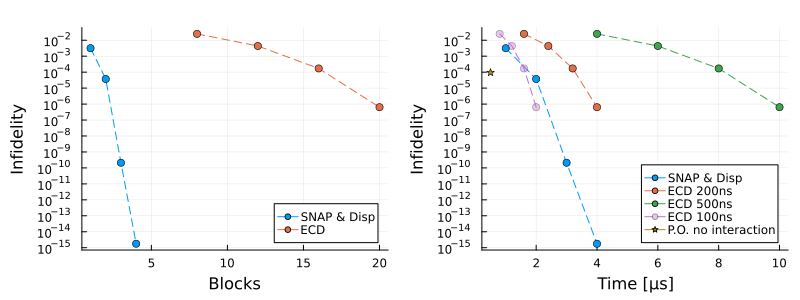

In [85]:
plot(blocks_snap_disp[1:end-1], infidelities_snap_disp[1:end-1], label= "SNAP & Disp", linestyle=:dash, marker = :circle, xlabel="Time [μs]", ylabel="Infidelity", yaxis=:log, fmt = :PDF, yticks=exp10.(range(-16, stop=0, length=17)), legend=:bottomright, layout=2, subplot=1, size=(800,300), margin=5mm)
plot!(blocks_snap_disp[1:end-1],infidelities_snap_disp[1:end-1], label= "SNAP & Disp", linestyle=:dash, marker = :circle, xlabel="Time [μs]", ylabel="Infidelity", yaxis=:log, fmt = :PDF, yticks=exp10.(range(-16, stop=0, length=17)), legend=:bottomright, layout=2, subplot=2)
plot!(blocks_ecd,infidelities_ecd, label= "ECD", linestyle=:dash, marker = :circle, xlabel="Blocks", ylabel="Infidelity", yaxis=:log, fmt = :PDF, yticks=exp10.(range(-16, stop=0, length=17)), subplot=1)
plot!(blocks_ecd*0.2,infidelities_ecd, label= "ECD 200ns", linestyle=:dash, marker = :circle, xlabel="Time [μs]", ylabel="Infidelity", yaxis=:log, fmt = :PDF, yticks=exp10.(range(-16, stop=0, length=17)), subplot=2)
plot!(blocks_ecd*0.5,infidelities_ecd, label= "ECD 500ns", linestyle=:dash, marker = :circle, xlabel="Time [μs]", ylabel="Infidelity", yaxis=:log, fmt = :PDF, yticks=exp10.(range(-16, stop=0, length=17)), subplot=2)
plot!(blocks_ecd*0.1,infidelities_ecd, label= "ECD 100ns", linestyle=:dash,  markeralpha= 0.4, marker = :circle, xlabel="Time [μs]", ylabel="Infidelity", yaxis=:log, fmt = :PDF, yticks=exp10.(range(-16, stop=0, length=17)), subplot=2)
#savefig("../../plots/blocksandtime_ecd_vs_snap_vs_PO/stateeprepRX_7.pdf")

# RX_GATE 3,4 5 photons

In [101]:
X_gate_ecd = DataFrame(CSV.File("../../data/R_X/5_photons/ECD/pi_over_10.txt"))
X_gate_snap = DataFrame(CSV.File("../../data/R_X/5_photons/SNAP_Disp/pi_over_10.txt"))

infidelities_ecd = [norm(minimum(eachrow(val).fidelity)) for val in groupby(X_gate_ecd, "blocks")]
blocks_ecd = [minimum(eachrow(val).blocks) for val in groupby(X_gate_ecd, "blocks")]

infidelities_snap_disp = [norm(minimum(eachrow(val).fidelity)) for val in groupby(X_gate_snap, "blocks")]
blocks_snap_disp = [minimum(eachrow(val).blocks) for val in groupby(X_gate_snap, "blocks")]

3-element Vector{Int64}:
 1
 2
 3

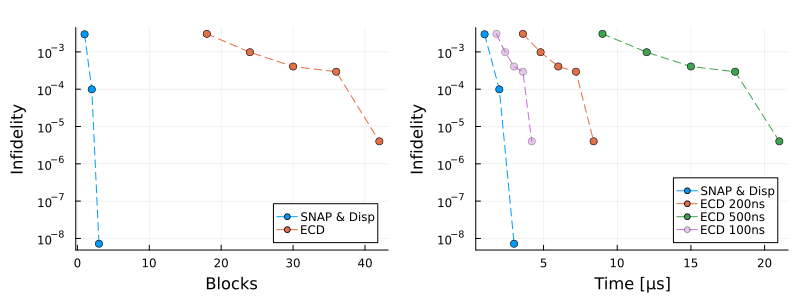

In [103]:
plot(blocks_snap_disp, infidelities_snap_disp, label= "SNAP & Disp", linestyle=:dash, marker = :circle, xlabel="Time [μs]", ylabel="Infidelity", yaxis=:log, fmt = :PDF, yticks=exp10.(range(-16, stop=0, length=17)), legend=:bottomright, layout=2, subplot=1, size=(800,300), margin=5mm)
plot!(blocks_snap_disp,infidelities_snap_disp, label= "SNAP & Disp", linestyle=:dash, marker = :circle, xlabel="Time [μs]", ylabel="Infidelity", yaxis=:log, fmt = :PDF, yticks=exp10.(range(-16, stop=0, length=17)), legend=:bottomright, layout=2, subplot=2)
plot!(blocks_ecd,infidelities_ecd, label= "ECD", linestyle=:dash, marker = :circle, xlabel="Blocks", ylabel="Infidelity", yaxis=:log, fmt = :PDF, yticks=exp10.(range(-16, stop=0, length=17)), subplot=1)
plot!(blocks_ecd*0.2,infidelities_ecd, label= "ECD 200ns", linestyle=:dash, marker = :circle, xlabel="Time [μs]", ylabel="Infidelity", yaxis=:log, fmt = :PDF, yticks=exp10.(range(-16, stop=0, length=17)), subplot=2)
plot!(blocks_ecd*0.5,infidelities_ecd, label= "ECD 500ns", linestyle=:dash, marker = :circle, xlabel="Time [μs]", ylabel="Infidelity", yaxis=:log, fmt = :PDF, yticks=exp10.(range(-16, stop=0, length=17)), subplot=2)
plot!(blocks_ecd*0.1,infidelities_ecd, label= "ECD 100ns", linestyle=:dash,  markeralpha= 0.4, marker = :circle, xlabel="Time [μs]", ylabel="Infidelity", yaxis=:log, fmt = :PDF, yticks=exp10.(range(-16, stop=0, length=17)), subplot=2)
#savefig("../../plots/blocksandtime_ecd_vs_snap_vs_PO/gateprepRX_5photons.pdf")

# RX_GATE 3,4 3 photons

In [98]:
X_gate_ecd = DataFrame(CSV.File("../../data/R_X/3_photons/ECD/pi_over_10.txt"))
X_gate_snap = DataFrame(CSV.File("../../data/R_X/3_photons/SNAP_Disp/pi_over_10.txt"))

infidelities_ecd = [norm(minimum(eachrow(val).fidelity)) for val in groupby(X_gate_ecd, "blocks")]
blocks_ecd = [minimum(eachrow(val).blocks) for val in groupby(X_gate_ecd, "blocks")]

infidelities_snap_disp = [norm(minimum(eachrow(val).fidelity)) for val in groupby(X_gate_snap, "blocks")]
blocks_snap_disp = [minimum(eachrow(val).blocks) for val in groupby(X_gate_snap, "blocks")]

5-element Vector{Int64}:
 1
 2
 3
 4
 5

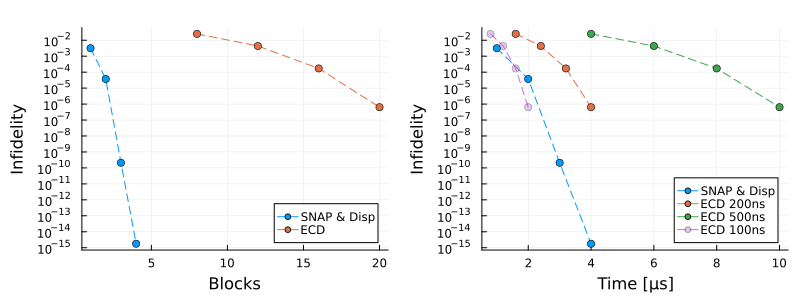

In [100]:
plot(blocks_snap_disp[1:end-1], infidelities_snap_disp[1:end-1], label= "SNAP & Disp", linestyle=:dash, marker = :circle, xlabel="Time [μs]", ylabel="Infidelity", yaxis=:log, fmt = :PDF, yticks=exp10.(range(-16, stop=0, length=17)), legend=:bottomright, layout=2, subplot=1, size=(800,300), margin=5mm)
plot!(blocks_snap_disp[1:end-1],infidelities_snap_disp[1:end-1], label= "SNAP & Disp", linestyle=:dash, marker = :circle, xlabel="Time [μs]", ylabel="Infidelity", yaxis=:log, fmt = :PDF, yticks=exp10.(range(-16, stop=0, length=17)), legend=:bottomright, layout=2, subplot=2)
plot!(blocks_ecd,infidelities_ecd, label= "ECD", linestyle=:dash, marker = :circle, xlabel="Blocks", ylabel="Infidelity", yaxis=:log, fmt = :PDF, yticks=exp10.(range(-16, stop=0, length=17)), subplot=1)
plot!(blocks_ecd*0.2,infidelities_ecd, label= "ECD 200ns", linestyle=:dash, marker = :circle, xlabel="Time [μs]", ylabel="Infidelity", yaxis=:log, fmt = :PDF, yticks=exp10.(range(-16, stop=0, length=17)), subplot=2)
plot!(blocks_ecd*0.5,infidelities_ecd, label= "ECD 500ns", linestyle=:dash, marker = :circle, xlabel="Time [μs]", ylabel="Infidelity", yaxis=:log, fmt = :PDF, yticks=exp10.(range(-16, stop=0, length=17)), subplot=2)
plot!(blocks_ecd*0.1,infidelities_ecd, label= "ECD 100ns", linestyle=:dash,  markeralpha= 0.4, marker = :circle, xlabel="Time [μs]", ylabel="Infidelity", yaxis=:log, fmt = :PDF, yticks=exp10.(range(-16, stop=0, length=17)), subplot=2)
#plot!([0.1], [1.271882e-3], label= "Pulse optimisation", linestyle=:dash, marker = :diamond, subplot=2)
#savefig("../../plots/blocksandtime_ecd_vs_snap_vs_PO/gateprepRX_3photons.pdf")